In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
X_train=[]
Y_train=[]
image_size=150
labels=['1','2','3']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/BrainTumorDetection/Classification/Data',i)
    for j in os.listdir (folderPath):
        img=cv2.imread(os.path.join(folderPath,j))
        img=cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/BrainTumorDetection/Classification/Data',i)
    for j in os.listdir(folderPath):
        img=cv2.imread(os.path.join(folderPath,j))
        img=cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [4]:
X_train,Y_train=shuffle(X_train,Y_train,random_state=10)

In [5]:
X_train.shape

(6158, 150, 150, 3)

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.1,random_state=10)

In [7]:
y_train_new=[]
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train=tf.keras.utils.to_categorical(y_train)

y_test_new=[]
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test=tf.keras.utils.to_categorical(y_test)

In [8]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [11]:
history=model.fit(X_train,y_train,epochs=50, batch_size=40, verbose=2, validation_split=0.1)

Epoch 1/50
125/125 - 34s - loss: 1.7580 - accuracy: 0.4983 - val_loss: 0.8596 - val_accuracy: 0.5946 - 34s/epoch - 269ms/step
Epoch 2/50
125/125 - 14s - loss: 0.7005 - accuracy: 0.6822 - val_loss: 0.6082 - val_accuracy: 0.7459 - 14s/epoch - 114ms/step
Epoch 3/50
125/125 - 14s - loss: 0.4870 - accuracy: 0.8017 - val_loss: 0.3674 - val_accuracy: 0.8559 - 14s/epoch - 115ms/step
Epoch 4/50
125/125 - 14s - loss: 0.3677 - accuracy: 0.8582 - val_loss: 0.4208 - val_accuracy: 0.8414 - 14s/epoch - 114ms/step
Epoch 5/50
125/125 - 15s - loss: 0.2741 - accuracy: 0.8953 - val_loss: 0.3776 - val_accuracy: 0.8054 - 15s/epoch - 118ms/step
Epoch 6/50
125/125 - 15s - loss: 0.2605 - accuracy: 0.8965 - val_loss: 0.2574 - val_accuracy: 0.9315 - 15s/epoch - 117ms/step
Epoch 7/50
125/125 - 15s - loss: 0.2211 - accuracy: 0.9170 - val_loss: 0.3348 - val_accuracy: 0.8523 - 15s/epoch - 117ms/step
Epoch 8/50
125/125 - 14s - loss: 0.1925 - accuracy: 0.9246 - val_loss: 0.1924 - val_accuracy: 0.9351 - 14s/epoch - 115

<ipython-input-12-73ae27f81524>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs,acc,'r',label='Training Accuracy',color='green')


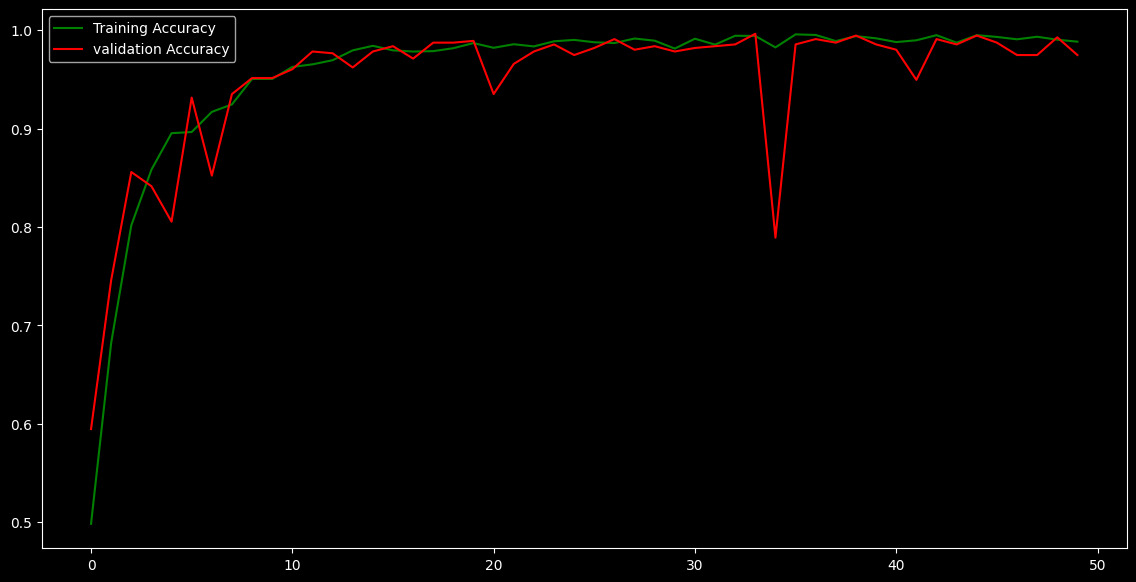

In [12]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label='Training Accuracy',color='green')
plt.plot(epochs,val_acc,'r',label='validation Accuracy')
plt.legend(loc='upper left')
plt.show()

<ipython-input-13-0df3e4996d06>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs,loss,'r',label='Training Loss',color='green')


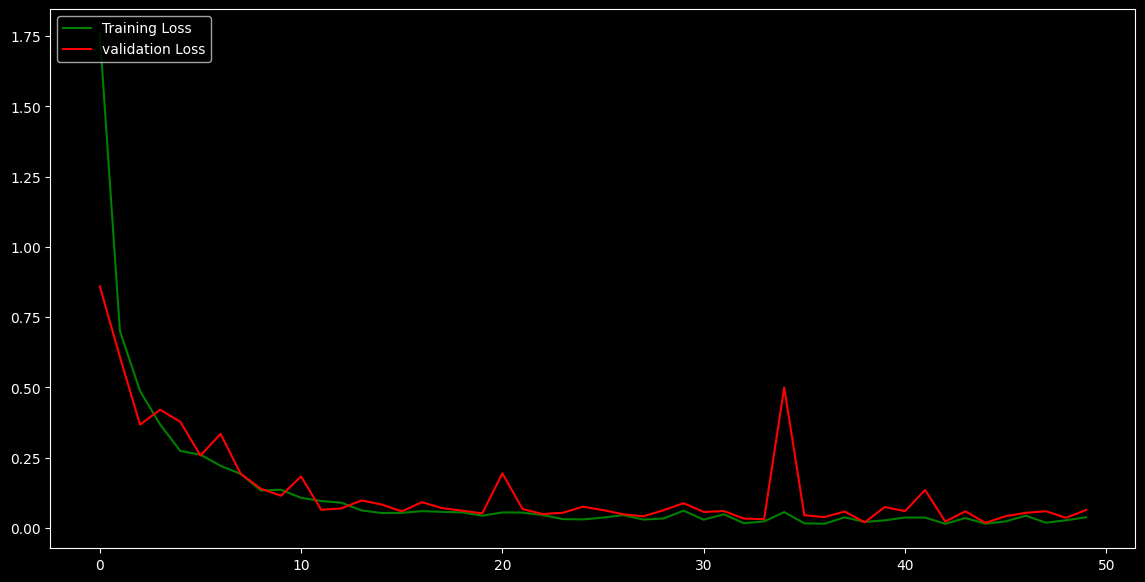

In [13]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(loss))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label='Training Loss',color='green')
plt.plot(epochs,val_loss,'r',label='validation Loss')
plt.legend(loc='upper left')
plt.show()

In [14]:
model.save('/content/drive/MyDrive/BrainTumorDetection/Classification/Classification.h5')

In [15]:
def prediction(out):
    if out==0:
        return 'meningioma'
    elif out==1:
        return 'glioma'
    elif out==2:
        return 'pituitary tumor'

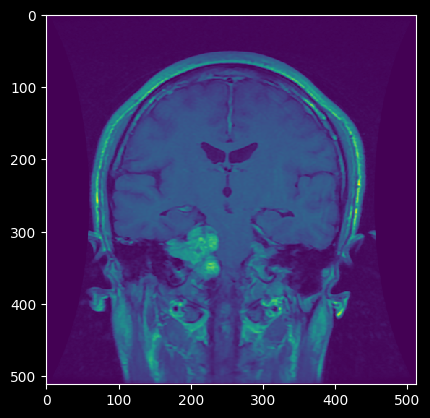

1/1 [==============================] - 1s 512ms/step


'meningioma'

In [16]:
img_file = '/content/drive/MyDrive/BrainTumorDetection/Classification/Data/1/2300.png'
img=cv2.imread(img_file)
img=cv2.resize(img,(150,150))
img_array=np.array(img)
img_array=img_array.reshape(1,150,150,3)
img=image.load_img(img_file)
plt.imshow(img,interpolation='nearest')
plt.show()
a=model.predict(img_array)
indices=a.argmax()
prediction(indices)

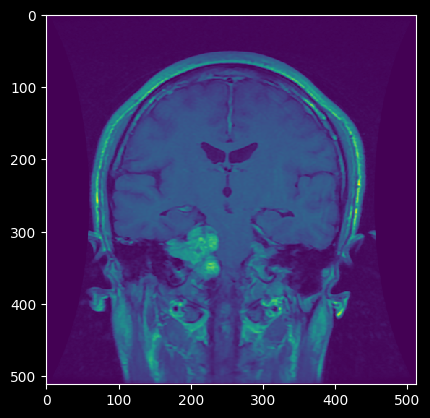

1/1 [==============================] - 0s 21ms/step


'meningioma'

In [17]:
img=image.load_img('/content/drive/MyDrive/BrainTumorDetection/Classification/Data/1/2300.png')
plt.imshow(img,interpolation='nearest')
plt.show()
a=model.predict(img_array)
out=a.argmax()
prediction(out)

In [19]:
model.save('classifiaction_brain_tumor')

In [21]:
%cp -r "/content/classifiaction_brain_tumor" "/content/drive/MyDrive/output"